In [7]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
# The two statemens below are used mainly to set up a plotting
# default style that's better than the default from matplotlib
import seaborn as sns
plt.style.use('bmh')

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

from shapely.wkt import loads

data_pth = "../Data/"


In [8]:
transit = gpd.read_file(os.path.join(data_pth, "routes.shp"))

In [9]:
transit.head()

,ROUTE,RTE_NUM,RTE_PART,SVC_TYPE,Shape_len,geometry
0,49AS,49,None,AS,29131.311348,(LINESTRING (1274861.849142477 242821.27891846...
1,545EX,545,None,EX,196543.260899,(LINESTRING (1320003.625000477 238360.56211812...
2,541EX,541,None,EX,120346.500296,(LINESTRING (1320003.625000477 238360.56211812...
3,118,118,None,None,30847.145603,(LINESTRING (1254198.670980722 194764.21000655...
4,255,255,None,None,183184.375857,(LINESTRING (1307287.499842227 262350.12503130...


In [10]:
transit.crs

{u'ellps': u'GRS80',
 u'lat_0': 47,
 u'lat_1': 47.5,
 u'lat_2': 48.73333333333333,
 u'lon_0': -120.8333333333333,
 u'no_defs': True,
 u'proj': u'lcc',
 u'towgs84': u'0,0,0,0,0,0,0',
 u'units': u'us-ft',
 u'x_0': 500000.0000000001,
 u'y_0': 0}

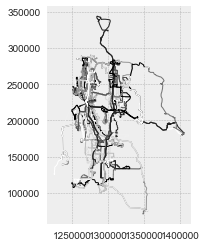

In [11]:
transit.plot()

In [12]:
transit.geom_type

0      MultiLineString
1      MultiLineString
2      MultiLineString
3      MultiLineString
4      MultiLineString
5      MultiLineString
6      MultiLineString
7      MultiLineString
8      MultiLineString
9      MultiLineString
10     MultiLineString
11     MultiLineString
12     MultiLineString
13     MultiLineString
14     MultiLineString
15     MultiLineString
16     MultiLineString
17     MultiLineString
18     MultiLineString
19     MultiLineString
20     MultiLineString
21     MultiLineString
22     MultiLineString
23     MultiLineString
24     MultiLineString
25     MultiLineString
26     MultiLineString
27     MultiLineString
28     MultiLineString
29     MultiLineString
            ...       
253    MultiLineString
254    MultiLineString
255    MultiLineString
256    MultiLineString
257    MultiLineString
258    MultiLineString
259    MultiLineString
260    MultiLineString
261    MultiLineString
262    MultiLineString
263    MultiLineString
264    MultiLineString
265    Mult

In [13]:
transit.geometry.bounds

,minx,miny,maxx,maxy
0,1.273444e+06,223012.328051,1.276067e+06,245403.859055
1,1.269168e+06,218125.197077,1.328320e+06,250245.499962
2,1.274735e+06,232376.453023,1.320244e+06,246074.609026
3,1.237461e+06,190400.714140,1.254384e+06,194764.210007
4,1.269170e+06,219190.582414,1.310351e+06,274225.249903
5,1.235833e+06,146257.760104,1.237633e+06,158510.193932
6,1.269168e+06,219031.895723,1.310351e+06,274225.249903
7,1.255074e+06,193643.311986,1.271446e+06,229077.266052
8,1.268431e+06,171120.004014,1.309943e+06,290222.065022
9,1.346464e+06,179391.262203,1.403376e+06,201687.664335


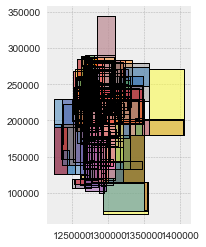

In [14]:
transit.envelope.plot();

In [16]:
markets = gpd.read_file(os.path.join(data_pth, "farmers_markets.shp"))

In [17]:
markets.head()

,ABB_NAME,ADDRESS,CITY,CODE,COUNTYNAME,CRDITDEBIT,DAYOFWEEK,EBTFDSTAMP,ENDTIME,END_DATE,ESITE,FEATURE_ID,LOCATION,NAME,STARTTIME,START_DATE,WEBSITE,ZIPCODE,geometry
0,Steilacoom Farmers Market,Wilkes and Lafayette Street,Steilacoom,903,Pierce,FALSE,Wednesdays,FALSE\n,7:00:00 PM,2012-08-29,0,903014,Corner of Lafayette & Wilkes Street,Steilacoom Farmers Market,3:00:00 PM,2012-06-13,http://www.steilacoomfarmersmarket.org,98388,POINT (1201262.459924191 68070.77015243471)
1,Gig Harbor Farmers Market,6808 Kimball Drive,Gig Harbor,903,Pierce,FALSE,Saturdays,FALSE\n,2:00:00 PM,2012-09-02,0,903015,4701 Pt. Fosdick Drive,Gig Harbor Farmers Market,8:30:00 AM,2012-04-07,http://www.gigharborfarmersmarket.com,98335,POINT (1205476.960025355 121975.359849602)
2,Gig Harbor Farmers Market,3207 Harborview Drive,Gig Harbor,903,Pierce,FALSE,Wednesdays,FALSE\n,5:00:00 PM,2012-09-26,0,903016,3207 Harborview Drive,Gig Harbor Farmers Market,12:00:00 PM,2012-06-06,http://www.gigharborfarmersmarket.com/,98335,POINT (1206799.020045281 125593.2801071852)
3,Kingston Farmers Market,25877 Washington Blvd. NE,Kingston,903,Kitsap,FALSE,Saturdays,FALSE\n,2:00:00 PM,2012-10-20,0,903018,Corner of Central Avenue & Washington Boulevard,Kingston Farmers Market,9:00:00 AM,2012-05-05,http://www.kingstonfarmersmarket.com/,98346,POINT (1231796.050103605 295207.8001294434)
4,Proctor Farmers Market,North 27th and Proctor Street,Tacoma,903,Pierce,FALSE,Saturdays,FALSE\n,2:00:00 PM,2012-12-22,0,903020,North 27th Street & Proctor Street,Proctor Farmers Market,9:00:00 AM,2012-03-31,http://www.proctorfarmersmarket.com,98407,POINT (1229393.429908857 103531.3701628596)


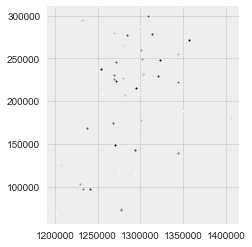

In [18]:
markets.plot()

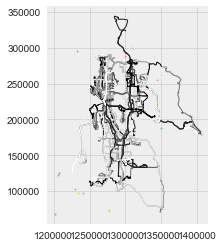

In [19]:
transit.plot(ax=markets.plot(cmap='Set2', alpha=1), alpha=1);

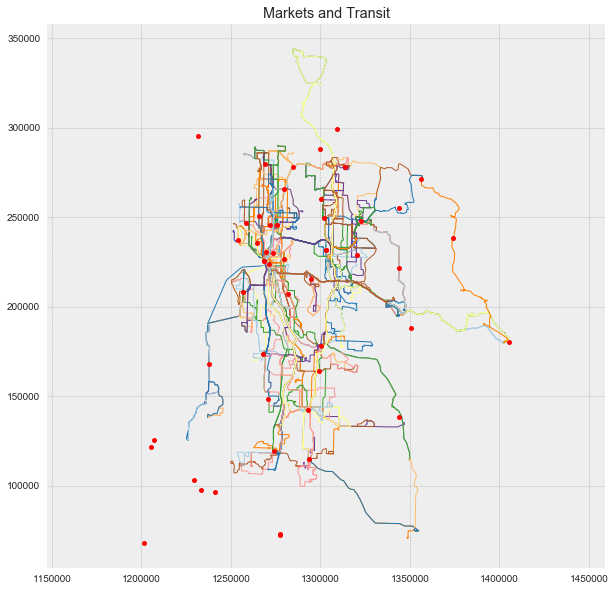

In [55]:
f, ax = plt.subplots(1, figsize=(10, 10))
# Other nice categorical color maps (cmap) include 'Set2' and 'Set3'
transit.plot(cmap='Paired', alpha=1, linewidth=1, ax=ax)
markets.plot(alpha=1, ax=ax, marker='o', color='red', markersize=5)
ax.set_ylim([-100, 100])
ax.set_title('Markets and Transit')
plt.axis('equal');

In [20]:
circles = markets.buffer(10000)

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
# Other nice categorical color maps (cmap) include 'Set2' and 'Set3'
transit.plot(cmap='Paired', alpha=1, linewidth=1, ax=ax)
circles.plot(ax=ax, marker='o', color='orange', markersize=5)
ax.set_ylim([-100, 100])
ax.set_title('Markets and Transit')
plt.axis('equal');